In [2]:
%matplotlib inline
'''Standard python modules'''
import sys

'''For scientific computing'''
from numpy import *
import scipy

'''For plotting'''
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D

EX_DIRECTORY_PATH = './data/'

def featureNormalizeLoop( data ):
    """Normalize the features using loop, this is the slower version"""
    mu          = []
    sigma       = []
    data_norm = zeros( shape(data), data.dtype )

    for col in range( 0, shape(data)[1] ):
        mu.append    ( mean( data[:, col] ) )
        sigma.append( std ( data[:, col], ddof=1 ) ) # if ddof = 0 sigma will be uncorrected sample standard deviation
        data_norm[:, col] = map( lambda x: (x - mu[col]) / sigma[col], data[:, col] )
        
    return data_norm, array(mu), array( sigma )


def featureNormalize( data ):
    """A vectorized version of feature normalization"""
    mu             = mean( data, axis=0 )
    data_norm     = data - mu
    sigma         = std( data_norm, axis=0, ddof=1 )
    data_norm     = data_norm / sigma
    return data_norm, mu, sigma


def gradientDescent( X, y, theta, alpha, iters, m ):
    """Run a gradient descent"""
    grad  = copy( theta )
    max_j         = shape(X)[1]
    J_history     = []
    alpha_div_m = alpha / m

    for counter in range( 0, iters ):
        inner_sum     = X.T.dot(X.dot( grad ) - y)
        grad         = grad - alpha_div_m * inner_sum
        J_history.append( computeCost(X, y, grad, m ) )

    return J_history, grad


def computeCost( X, y, theta, m ):
    term = X.dot( theta ) - y
    return ( term.T.dot( term ) / (2 * m) )[0, 0]

def normalEquation( X, y ):
    return linalg.inv(X.T.dot( X )).dot( X.T ).dot( y )


def part3_1():
    data = genfromtxt( EX_DIRECTORY_PATH + "ex1data2.txt", delimiter = ',' )
    X = data[:, 0:2]
    y = data[:, 2:3]

    X, mu, sigma = featureNormalize( X )
    print (X)
    print (mu)
    print (sigma)

def part3_2():
    data = genfromtxt( EX_DIRECTORY_PATH + "ex1data2.txt", delimiter = ',' )
    X = data[:, 0:2]
    y = data[:, 2:3]
    m = shape( X )[0]

    X, mu, sigma = featureNormalize( X )

    X             = c_[ ones((m, 1)), X ] # add intercept to X
    iterations     = 400
    alphas         = [0.01, 0.03, 0.1, 0.3, 1.0]

    # for each alpha, try to do gradient descent and plot the convergence curve
    for alpha in alphas:
        theta = zeros( (3, 1) )
        J_history, theta = gradientDescent( X, y, theta, alpha, iterations, m )

        # create an array of number of iterations
        number_of_iterations = array( [x for x in range( 1, iterations + 1 )] ).reshape( iterations, 1)

        pyplot.plot( number_of_iterations, J_history, '-b' )
        pyplot.title( "Alpha = %f" % (alpha) )
        pyplot.xlabel('Number of iterations')
        pyplot.ylabel('Cost J')
        pyplot.xlim( [0, 50] )
        pyplot.show( block=True )

        # 1650 sq feet 3 bedroom house
        test = array([1.0, 1650.0, 3.0])
        # exclude intercept units
        test[1:] = (test[1:] - mu) / sigma
        print(test.dot( theta ))

    
def part3_3():
    data = genfromtxt( EX_DIRECTORY_PATH + "ex1data2.txt", delimiter = ',' )
    X = data[:, 0:2]
    y = data[:, 2:3]
    m = shape( X )[0]

    X = c_[ ones((m, 1)), X ] # add intercept to X

    theta = normalEquation( X, y )
    # 1650 sq feet 3 bedroom house
    test = array([1.0, 1650.0, 3.0])
    print(test.dot( theta ))


def main():
    set_printoptions(precision=6, linewidth=200)

In [3]:
    part3_1()

[[ 1.30009869e-01 -2.23675187e-01]
 [-5.04189838e-01 -2.23675187e-01]
 [ 5.02476364e-01 -2.23675187e-01]
 [-7.35723065e-01 -1.53776691e+00]
 [ 1.25747602e+00  1.09041654e+00]
 [-1.97317285e-02  1.09041654e+00]
 [-5.87239800e-01 -2.23675187e-01]
 [-7.21881404e-01 -2.23675187e-01]
 [-7.81023044e-01 -2.23675187e-01]
 [-6.37573110e-01 -2.23675187e-01]
 [-7.63567023e-02  1.09041654e+00]
 [-8.56737193e-04 -2.23675187e-01]
 [-1.39273340e-01 -2.23675187e-01]
 [ 3.11729182e+00  2.40450826e+00]
 [-9.21956312e-01 -2.23675187e-01]
 [ 3.76643089e-01  1.09041654e+00]
 [-8.56523009e-01 -1.53776691e+00]
 [-9.62222960e-01 -2.23675187e-01]
 [ 7.65467909e-01  1.09041654e+00]
 [ 1.29648433e+00  1.09041654e+00]
 [-2.94048269e-01 -2.23675187e-01]
 [-1.41790005e-01 -1.53776691e+00]
 [-4.99156507e-01 -2.23675187e-01]
 [-4.86733818e-02  1.09041654e+00]
 [ 2.37739217e+00 -2.23675187e-01]
 [-1.13335621e+00 -2.23675187e-01]
 [-6.82873089e-01 -2.23675187e-01]
 [ 6.61026291e-01 -2.23675187e-01]
 [ 2.50809813e-01 -2

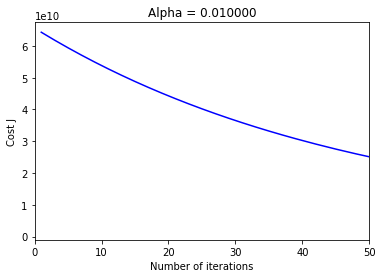

[289314.62033778]


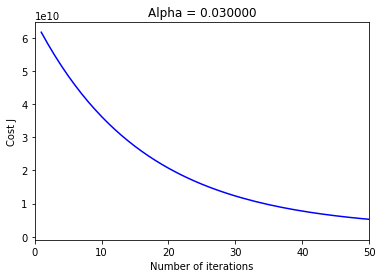

[293149.9943295]


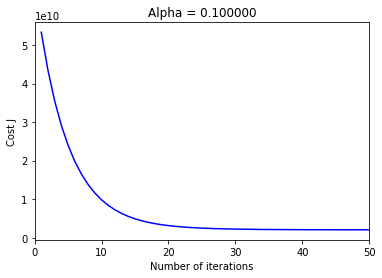

[293081.46462228]


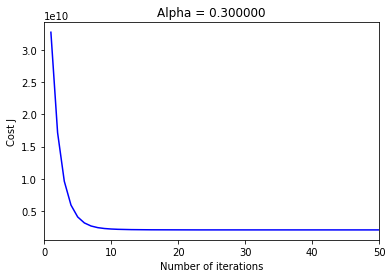

[293081.4643349]


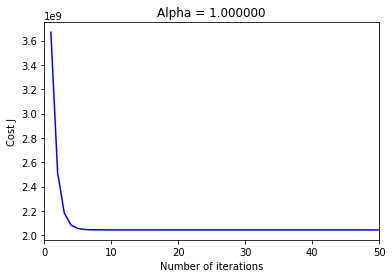

[293081.4643349]


In [4]:
    part3_2()

In [5]:
    part3_3()

[293081.46433489]
